In [1]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
#definir os caminhos 
#definir train_dir test_dir valid_dir

train_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\train'
test_dir = 'C:\\Users\\rafin\OneDrive\\Área de Trabalho\\trabalho de deep\\test'
valid_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\valid'

In [3]:
# aqui ta normalizando 
img_width, img_height = 128, 128

In [4]:
# Definir tamanho do lote
batch_size = 64




In [5]:
# Gerar dados de treinamento e dividir por 255 

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 37272 images belonging to 379 classes.


In [7]:
# Gerar dados de validação
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 9182 images belonging to 379 classes.


In [8]:
# Gerar dados de teste
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 20075 images belonging to 379 classes.


In [9]:
# Construir a rede neural conv2d
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding="same", input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 256)      0

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Treino
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
583/583 [==============================] - 1686s 3s/step - loss: 4.6565 - accuracy: 0.1021 - val_loss: 3.4187 - val_accuracy: 0.2847
Epoch 2/30
583/583 [==============================] - 903s 2s/step - loss: 3.0290 - accuracy: 0.3376 - val_loss: 2.4705 - val_accuracy: 0.4600
Epoch 3/30
583/583 [==============================] - 899s 2s/step - loss: 2.2037 - accuracy: 0.4887 - val_loss: 2.1912 - val_accuracy: 0.5132
Epoch 4/30
583/583 [==============================] - 897s 2s/step - loss: 1.6182 - accuracy: 0.6030 - val_loss: 2.0489 - val_accuracy: 0.5453
Epoch 5/30
583/583 [==============================] - 899s 2s/step - loss: 1.1681 - accuracy: 0.6972 - val_loss: 2.1074 - val_accuracy: 0.5473
Epoch 6/30
583/583 [==============================] - 900s 2s/step - loss: 0.8552 - accuracy: 0.7652 - val_loss: 2.2146 - val_accuracy: 0.5473
Epoch 7/30
583/583 [==============================] - 898s 2s/step - loss: 0.6341 - accuracy: 0.8202 - val_loss: 2.2136 - val_accuracy: 0.556

In [12]:
#acuracia
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
#print(history.history)

314/314 [==============================] - 491s 2s/step - loss: 922.4542 - accuracy: 0.5401
Test accuracy: 0.5400747060775757


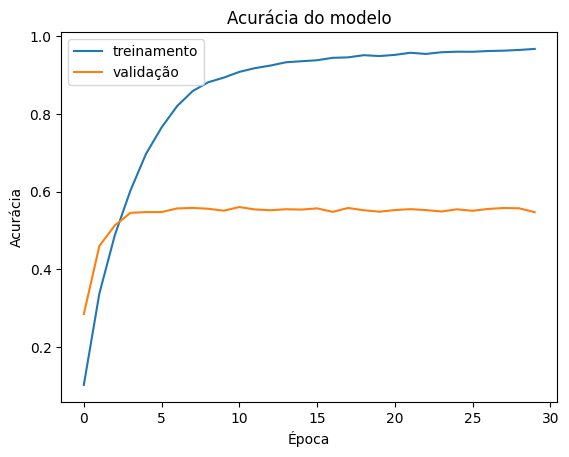

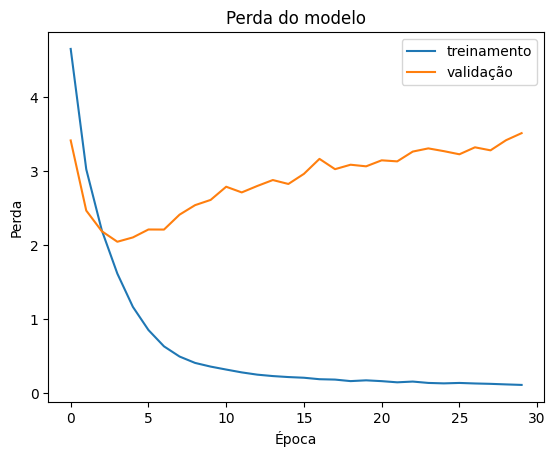

In [13]:

# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper right')
plt.show()

In [14]:
#import tensorflow as tf

# Verificar se a GPU está disponível
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
